This notebook is for classification on the relative risk dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '../scripts/')
from utils import *
from processing import *
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Loading Data

In [2]:
lead = 1
obs = 1

In [3]:
# Relative Risk with PTS
data = pd.read_csv("../csv/relative_1hr_lead_1hr_obs_data/relative_1hr_lead_1hr_obs_dataset_no_pts.csv", low_memory=False)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    766.0  69.0           78.0            78.0   
1             151708      1   1947.0  79.0           38.0            38.0   
2             152171      1   2320.0  84.0           38.0            38.0   
3             155126      1   3461.0  71.0           65.0            65.0   
4             156970      1  17939.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
22229        3352487      0    660.0  60.0           45.0            45.0   
22230        3352563      0    863.0  34.0           54.0            54.0   
22231        3352747      0   1066.0  30.0           31.0            31.0   
22232        3353044      0   3338.0  52.0           41.0            41.0   
22233        3353077      0   4550.0  60.0           36.0            36.0   

       UrgentAdmission  AdmissionCategory  NumBeds  TeachingStatus  ...  \
0                  1.0                4.0      2.0               0  ...   
1                  1.0                4.0      4.0               1  ...   
2                  0.0                4.0      2.0               0  ...   
3                  0.0                4.0      4.0               1  ...   
4                  1.0                4.0      4.0               1  ...   
...                ...                ...      ...             ...  ...   
22229              0.0                4.0      4.0               0  ...   
22230              1.0                4.0      2.0               0  ...   
22231              1.0                4.0      4.0               0  ...   
22232              1.0                4.0      2.0               0  ...   
22233              1.0                4.0      4.0               0  ...   

      comorbidity_alcohol comorbidity_drug comorbidity_depre last_24hr_urine  \
0                     0.0              0.0               0.0             NaN   
1                     0.0              0.0               0.0           300.0   
2                     0.0              0.0               0.0             NaN   
3                     0.0              0.0               0.0             NaN   
4                     1.0              0.0               0.0          1870.0   
...                   ...              ...               ...             ...   
22229                 NaN              NaN               NaN          2320.0   
22230                 0.0              0.0               0.0          1555.0   
22231                 0.0              0.0               0.0          2700.0   
22232                 0.0              0.0               0.0          2215.0   
22233                 0.0              0.0               0.0          2400.0   

      tranfuse_rbc tranfuse_plasma tranfuse_platelet dialysis  surgical  \
0                0               0                 0        1         0   
1                0               0                 0        0         0   
2                0               0                 0        0         1   
3                1               0                 0        0         1   
4                0               0                 0        0         0   
...            ...             ...               ...      ...       ...   
22229            0               0                 0        0         1   
22230            0               0                 0        0         0   
22231            0               0                 0        0         0   
22232            0               0                 0        0         0   
22233            0               0                 0        0         1   

       mv_duration  
0              0.0  
1              0.0  
2              0.0  
3            417.0  
4              0.0  
...            ...  
22229          0.0  
22230          0.0  
22231          0.0  
22232          0.0  
22233          0.0  

[22234 rows x 267 columns]

In [4]:
np.sum(data["Class"] == 0)

18443

In [5]:
for col in data.columns:
    print(col)
    print(missing_data(data, col))

PatientStayID
(0, 22234)
Class
(0, 22234)
LOS
(0, 22234)
Age
(1, 22234)
APACHEIVscore
(2626, 22234)
APACHEIVaScore
(2626, 22234)
UrgentAdmission
(620, 22234)
AdmissionCategory
(620, 22234)
NumBeds
(2288, 22234)
TeachingStatus
(0, 22234)
Gender
(1, 22234)
AdmitHeight
(0, 22234)
AdmitTime24
(0, 22234)
AdmitSource
(3816, 22234)
UnitType
(0, 22234)
UnitAdmitTime
(0, 22234)
UnitAdmitSource
(57, 22234)
AdmitWeight
(0, 22234)
HistAICD
(0, 22234)
HistAngina
(0, 22234)
HistArrythmia
(0, 22234)
HistCHF
(0, 22234)
HistCABG
(0, 22234)
HistHypertension
(0, 22234)
HistMI
(0, 22234)
HistPacemaker
(0, 22234)
HistPVD
(0, 22234)
HistPCI
(0, 22234)
HistPulmEmb
(0, 22234)
HistHeartTransp
(0, 22234)
HistValveDis
(0, 22234)
HistVenThromb
(0, 22234)
HistCushing
(0, 22234)
HistHypercalcemia
(0, 22234)
Histhyperthyroid
(0, 22234)
Histhypothyroid
(0, 22234)
Histdiabetes
(0, 22234)
HistSteroid Use
(0, 22234)
HistCirrhosis
(0, 22234)
HistHypersplenism
(0, 22234)
HistPUD
(0, 22234)
HistLiverTransp
(0, 22234)
HistA

In [6]:
data = process_all(data)
data["mv_duration_ratio"] = data["mv_duration"]/data["LOS"]
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    766.0  69.0           78.0            78.0   
1             151708      1   1947.0  79.0           38.0            38.0   
2             152171      1   2320.0  84.0           38.0            38.0   
3             155126      1   3461.0  71.0           65.0            65.0   
4             156970      1  17939.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
22229        3352487      0    660.0  60.0           45.0            45.0   
22230        3352563      0    863.0  34.0           54.0            54.0   
22231        3352747      0   1066.0  30.0           31.0            31.0   
22232        3353044      0   3338.0  52.0           41.0            41.0   
22233        3353077      0   4550.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  1.0      2.0               0     1.0  ...   
1                  1.0      4.0               1     0.0  ...   
2                  0.0      2.0               0     1.0  ...   
3                  0.0      4.0               1     0.0  ...   
4                  1.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
22229              0.0      4.0               0     1.0  ...   
22230              1.0      2.0               0     1.0  ...   
22231              1.0      4.0               0     0.0  ...   
22232              1.0      2.0               0     0.0  ...   
22233              1.0      4.0               0     1.0  ...   

      UnitAdmitSource_Floor UnitAdmitSource_ICU  UnitAdmitSource_Missing  \
0                         0                   0                        0   
1                         0                   0                        0   
2                         0                   0                        0   
3                         0                   0                        0   
4                         0                   0                        0   
...                     ...                 ...                      ...   
22229                     0                   0                        0   
22230                     0                   0                        0   
22231                     0                   0                        0   
22232                     1                   0                        0   
22233                     0                   0                        0   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
0                       0                      0   
1                       0                      0   
2                       1                      0   
3                       1                      0   
4                       0                      0   
...                   ...                    ...   
22229                   0                      0   
22230                   0                      0   
22231                   0                      0   
22232                   0                      0   
22233                   0                      0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
0                                  0                     0   
1                                  0                     0   
2                                  0                     0   
3                                  0                     0   
4                                  0                     0   
...                              ...                   ...   
22229                              0                     1   
22230                              0                     0   
22231                              0                     0   
22232                              0                     0   
22233                              0                     0   

       UnitAdmitSource_SDU  Ti

In [7]:
for col in data.columns:
    print(col)

PatientStayID
Class
LOS
Age
APACHEIVscore
APACHEIVaScore
UrgentAdmission
NumBeds
TeachingStatus
Gender
AdmitHeight
AdmitWeight
HistAICD
HistAngina
HistArrythmia
HistCHF
HistCABG
HistHypertension
HistMI
HistPacemaker
HistPVD
HistPCI
HistPulmEmb
HistHeartTransp
HistValveDis
HistVenThromb
HistCushing
HistHypercalcemia
Histhyperthyroid
Histhypothyroid
Histdiabetes
HistSteroid Use
HistCirrhosis
HistHypersplenism
HistPUD
HistLiverTransp
HistAplasticAnemia
HistChemotherapy
HistRadiationTherapy
HistCancer
HistClottingDisorder
HistHemolyticAnemia
HistHypercoagulableCondition
HistOncology
HistMyeloproliferativeDisease
HistSickleCellDisease
HistImmuneSuppr
HistDementia
HistIntracranialMass
HistNeuromuscularDis
HistSeizures
HistStrokes
HistTIA
HistAsthma
HistCOPD
HistRespiratoryFail
HistRestrictiveDis
HistLungTransp
HistSarcoidosis
HistStoneDisease
HistNeurogenicBladd
HistRenalFail
HistRenalInsuff
HistRTA
HistRenalTransp
HistRheumatic
relative_1hr_lead_1hr_obsAcetaminophen
relative_1hr_lead_1hr_ob

In [8]:
for col in data.columns:
    if missing_data(data, col)[0] > 0.2*missing_data(data,col)[1]:
        data.drop(labels=[col], axis=1, inplace=True)
        print(col)
#data.to_csv("../csv/relative_1hr_lead_1hr_obs_data/relative_1hr_lead_1hr_obs_dataset_no_pts_pre_rf.csv", index=False)
data

last_albumin
diff_albumin
last_alkaline phos.
diff_alkaline phos.
last_ALT (SGPT)
diff_ALT (SGPT)
last_anion gap
diff_anion gap
last_AST (SGOT)
diff_AST (SGOT)
last_bedside glucose
diff_bedside glucose
last_BUN
diff_BUN
last_calcium
diff_calcium
last_chloride
diff_chloride
last_creatinine
diff_creatinine
last_FiO2
diff_FiO2
last_glucose
diff_glucose
last_Hct
diff_Hct
last_Hgb
diff_Hgb
last_lactate
diff_lactate
last_-lymphs
diff_-lymphs
last_magnesium
diff_magnesium
last_MCH
diff_MCH
last_MCHC
diff_MCHC
last_MCV
diff_MCV
last_-monos
diff_-monos
last_MPV
diff_MPV
last_O2 Sat (%)
diff_O2 Sat (%)
last_paCO2
diff_paCO2
last_paO2
diff_paO2
last_pH
diff_pH
last_phosphate
diff_phosphate
last_platelets x 1000
diff_platelets x 1000
last_-polys
diff_-polys
last_potassium
diff_potassium
last_PT
diff_PT
last_PT - INR
diff_PT - INR
last_RBC
diff_RBC
last_RDW
diff_RDW
last_sodium
diff_sodium
last_total bilirubin
diff_total bilirubin
last_total protein
diff_total protein
last_WBC x 1000
diff_WBC x 100

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    766.0  69.0           78.0            78.0   
1             151708      1   1947.0  79.0           38.0            38.0   
2             152171      1   2320.0  84.0           38.0            38.0   
3             155126      1   3461.0  71.0           65.0            65.0   
4             156970      1  17939.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
22229        3352487      0    660.0  60.0           45.0            45.0   
22230        3352563      0    863.0  34.0           54.0            54.0   
22231        3352747      0   1066.0  30.0           31.0            31.0   
22232        3353044      0   3338.0  52.0           41.0            41.0   
22233        3353077      0   4550.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  1.0      2.0               0     1.0  ...   
1                  1.0      4.0               1     0.0  ...   
2                  0.0      2.0               0     1.0  ...   
3                  0.0      4.0               1     0.0  ...   
4                  1.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
22229              0.0      4.0               0     1.0  ...   
22230              1.0      2.0               0     1.0  ...   
22231              1.0      4.0               0     0.0  ...   
22232              1.0      2.0               0     0.0  ...   
22233              1.0      4.0               0     1.0  ...   

      UnitAdmitSource_Floor UnitAdmitSource_ICU  UnitAdmitSource_Missing  \
0                         0                   0                        0   
1                         0                   0                        0   
2                         0                   0                        0   
3                         0                   0                        0   
4                         0                   0                        0   
...                     ...                 ...                      ...   
22229                     0                   0                        0   
22230                     0                   0                        0   
22231                     0                   0                        0   
22232                     1                   0                        0   
22233                     0                   0                        0   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
0                       0                      0   
1                       0                      0   
2                       1                      0   
3                       1                      0   
4                       0                      0   
...                   ...                    ...   
22229                   0                      0   
22230                   0                      0   
22231                   0                      0   
22232                   0                      0   
22233                   0                      0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
0                                  0                     0   
1                                  0                     0   
2                                  0                     0   
3                                  0                     0   
4                                  0                     0   
...                              ...                   ...   
22229                              0                     1   
22230                              0                     0   
22231                              0                     0   
22232                              0                     0   
22233                              0                     0   

       UnitAdmitSource_SDU  Ti

In [9]:

common_imputation= ["Gender", "UrgentAdmission", "TeachingStatus"]
for col in data.columns:
    if col.startswith("comorbidity_") or col.startswith("Hist"):
        common_imputation.append(col)
one_hot_removal = []
remove = ["APACHEIVaScore", "relative_{}hr_lead_{}hr_obsHaloperidol".format(lead, obs), "relative_{}hr_lead_{}hr_obsPrecedex".format(lead, obs), "ventilator", "vented", "UnitAdmitSource_Missing", "vasopressors"]#, "mean_motor_GCS", 

exceptions = []# ["UrgentAdmission"]

mean_imputation = data.columns
mean_imputation = mean_imputation.drop(common_imputation)
mean_imputation = mean_imputation.drop(one_hot_removal)
mean_imputation = mean_imputation.drop(remove)
mean_imputation = mean_imputation.drop(exceptions)
mean_imputation = mean_imputation.tolist()

In [10]:
for col in data.columns:
    if col.startswith("count_"):
        data[col] = data[col].fillna(0)
    if col.startswith("diff_"):
        data[col] = data[col].fillna(0)


from sklearn.impute import SimpleImputer
data.drop(remove, axis=1, inplace = True)
imp_mean = SimpleImputer(strategy='mean')
data[mean_imputation] = imp_mean.fit_transform(data[mean_imputation])
imp_freq = SimpleImputer(strategy='most_frequent')
data[common_imputation] = imp_freq.fit_transform(data[common_imputation])
data[one_hot_removal] = data[one_hot_removal].replace(1, np.NaN)

In [11]:
data.dropna(inplace = True)
labels = data['Class']
data.drop(['Class'], axis=1, inplace=True)
print(len(data.index))
data

22234


PatientStayID      LOS   Age  APACHEIVscore  UrgentAdmission  NumBeds  \
0           150934.0    766.0  69.0           78.0              1.0      2.0   
1           151708.0   1947.0  79.0           38.0              1.0      4.0   
2           152171.0   2320.0  84.0           38.0              0.0      2.0   
3           155126.0   3461.0  71.0           65.0              0.0      4.0   
4           156970.0  17939.0  56.0           32.0              1.0      4.0   
...              ...      ...   ...            ...              ...      ...   
22229      3352487.0    660.0  60.0           45.0              0.0      4.0   
22230      3352563.0    863.0  34.0           54.0              1.0      2.0   
22231      3352747.0   1066.0  30.0           31.0              1.0      4.0   
22232      3353044.0   3338.0  52.0           41.0              1.0      2.0   
22233      3353077.0   4550.0  60.0           36.0              1.0      4.0   

       TeachingStatus  Gender  AdmitHeight  AdmitWeight  ...  \
0                 0.0     1.0        152.4    74.800000  ...   
1                 1.0     0.0        175.3    70.800000  ...   
2                 0.0     1.0        165.1    84.186548  ...   
3                 1.0     0.0        165.1    83.200000  ...   
4                 1.0     0.0        167.6    90.500000  ...   
...               ...     ...          ...          ...  ...   
22229             0.0     1.0        168.0   118.600000  ...   
22230             0.0     1.0        172.7    81.600000  ...   
22231             0.0     0.0        167.6    62.600000  ...   
22232             0.0     0.0        175.0    52.000000  ...   
22233             0.0     1.0        165.1   120.600000  ...   

       UnitAdmitSource_EmergencyDep  UnitAdmitSource_Floor  \
0                               1.0                    0.0   
1                               0.0                    0.0   
2                               0.0                    0.0   
3                               0.0                    0.0   
4                               1.0                    0.0   
...                             ...                    ...   
22229                           0.0                    0.0   
22230                           1.0                    0.0   
22231                           0.0                    0.0   
22232                           0.0                    1.0   
22233                           1.0                    0.0   

       UnitAdmitSource_ICU  UnitAdmitSource_OR  UnitAdmitSource_Other  \
0                      0.0                 0.0                    0.0   
1                      0.0                 0.0                    0.0   
2                      0.0                 1.0                    0.0   
3                      0.0                 1.0                    0.0   
4                      0.0                 0.0                    0.0   
...                    ...                 ...                    ...   
22229                  0.0                 0.0                    0.0   
22230                  0.0                 0.0                    0.0   
22231                  0.0                 0.0                    0.0   
22232                  0.0                 0.0                    0.0   
22233                  0.0                 0.0                    0.0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
0                                0.0                   0.0   
1                                0.0                   0.0   
2                                0.0                   0.0   
3                                0.0                   0.0   
4                                0.0                   0.0   
...                              ...                   ...   
22229                            0.0                   1.0   
22230                            0.0                   0.0   
22231                            0.0                   0.0   
22232                            0.

In [12]:
from sklearn import preprocessing

standard_data = data.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
standard_data

PatientStayID       LOS       Age  APACHEIVscore  UrgentAdmission  \
0           150934.0 -0.459335  0.347134       0.922794         0.397973   
1           151708.0 -0.128061  0.942904      -0.780218         0.397973   
2           152171.0 -0.023433  1.240789      -0.780218        -2.512731   
3           155126.0  0.296620  0.466288       0.369315        -2.512731   
4           156970.0  4.357742 -0.427366      -1.035670         0.397973   
...              ...       ...       ...            ...              ...   
22229      3352487.0 -0.489068 -0.189058      -0.482191        -2.512731   
22230      3352563.0 -0.432126 -1.738060      -0.099013         0.397973   
22231      3352747.0 -0.375184 -1.976367      -1.078245         0.397973   
22232      3353044.0  0.262119 -0.665674      -0.652492         0.397973   
22233      3353077.0  0.602088 -0.189058      -0.865368         0.397973   

        NumBeds  TeachingStatus    Gender  AdmitHeight  AdmitWeight  ...  \
0     -1.620206       -0.739255  1.052088    -1.011162    -0.345949  ...   
1      0.884570        1.352713 -0.950491     0.397930    -0.493373  ...   
2     -1.620206       -0.739255  1.052088    -0.229700     0.000000  ...   
3      0.884570        1.352713 -0.950491    -0.229700    -0.036360  ...   
4      0.884570        1.352713 -0.950491    -0.075869     0.232688  ...   
...         ...             ...       ...          ...          ...  ...   
22229  0.884570       -0.739255  1.052088    -0.051256     1.268337  ...   
22230 -1.620206       -0.739255  1.052088     0.237946    -0.095329  ...   
22231  0.884570       -0.739255 -0.950491    -0.075869    -0.795591  ...   
22232 -1.620206       -0.739255 -0.950491     0.379471    -1.186263  ...   
22233  0.884570       -0.739255  1.052088    -0.229700     1.342049  ...   

       UnitAdmitSource_EmergencyDep  UnitAdmitSource_Floor  \
0                          0.989352              -0.456907   
1                         -1.010762              -0.456907   
2                         -1.010762              -0.456907   
3                         -1.010762              -0.456907   
4                          0.989352              -0.456907   
...                             ...                    ...   
22229                     -1.010762              -0.456907   
22230                      0.989352              -0.456907   
22231                     -1.010762              -0.456907   
22232                     -1.010762               2.188631   
22233                      0.989352              -0.456907   

       UnitAdmitSource_ICU  UnitAdmitSource_OR  UnitAdmitSource_Other  \
0                 -0.14291           -0.302236              -0.034869   
1                 -0.14291           -0.302236              -0.034869   
2                 -0.14291            3.308676              -0.034869   
3                 -0.14291            3.308676              -0.034869   
4                 -0.14291           -0.302236              -0.034869   
...                    ...                 ...                    ...   
22229             -0.14291           -0.302236              -0.034869   
22230             -0.14291           -0.302236              -0.034869   
22231             -0.14291           -0.302236              -0.034869   
22232             -0.14291           -0.302236              -0.034869   
22233             -0.14291           -0.302236              -0.034869   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
0                          -0.185937             -0.277525   
1                          -0.185937             -0.277525   
2                          -0.185937             -0.277525   
3                          -0.185937             -0.277525   
4                          -0.185937             -0.277525   
...                              ...                   ...   
22229                      -0.185937              3.603283   
22230                      -0.185937             -0.277525   
2

In [13]:
for col in data.columns:
    print(col)

PatientStayID
LOS
Age
APACHEIVscore
UrgentAdmission
NumBeds
TeachingStatus
Gender
AdmitHeight
AdmitWeight
HistAICD
HistAngina
HistArrythmia
HistCHF
HistCABG
HistHypertension
HistMI
HistPacemaker
HistPVD
HistPCI
HistPulmEmb
HistHeartTransp
HistValveDis
HistVenThromb
HistCushing
HistHypercalcemia
Histhyperthyroid
Histhypothyroid
Histdiabetes
HistSteroid Use
HistCirrhosis
HistHypersplenism
HistPUD
HistLiverTransp
HistAplasticAnemia
HistChemotherapy
HistRadiationTherapy
HistCancer
HistClottingDisorder
HistHemolyticAnemia
HistHypercoagulableCondition
HistOncology
HistMyeloproliferativeDisease
HistSickleCellDisease
HistImmuneSuppr
HistDementia
HistIntracranialMass
HistNeuromuscularDis
HistSeizures
HistStrokes
HistTIA
HistAsthma
HistCOPD
HistRespiratoryFail
HistRestrictiveDis
HistLungTransp
HistSarcoidosis
HistStoneDisease
HistNeurogenicBladd
HistRenalFail
HistRenalInsuff
HistRTA
HistRenalTransp
HistRheumatic
relative_1hr_lead_1hr_obsAcetaminophen
relative_1hr_lead_1hr_obsAdrenergicBronchodil

In [14]:
pr_baseline = np.sum(labels[labels==1])/len(labels)

with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/pr_baseline".format(lead, obs), "wb") as f:
    pickle.dump(pr_baseline, f)

# Visualize Data

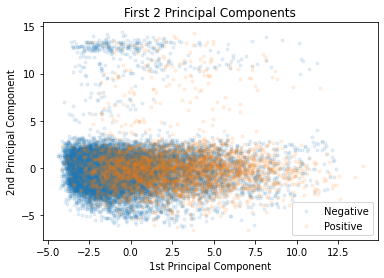

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standard_data.iloc[:,1:])
plt.figure()
plt.scatter(pca_data[labels==0][:, 0], pca_data[labels==0][:, 1], alpha = 0.1, marker='.')
plt.scatter(pca_data[labels==1][:, 0], pca_data[labels==1][:, 1], alpha=0.1, marker='.')
plt.legend(["Negative", "Positive"])
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("First 2 Principal Components")
plt.show()

In [14]:
positive = data[labels==1]
negative = data[labels==0]

In [15]:
print(np.mean(positive["mv_duration"]))
print(np.mean(negative["mv_duration"]))

1688.9266970907017
428.4873738996337


In [ ]:

plt.figure()
plt.boxplot([np.asarray(positive[positive["mv_duration"] != -0]["mv_duration"])/60, np.asarray(negative[negative["mv_duration"] != -0]["mv_duration"])/60], widths = 0.75, showfliers=False)
plt.xticks([1, 2], ["Delirium", "No Delirium"])
plt.show()

In [ ]:

plt.figure()
plt.boxplot([np.asarray(positive[positive["mv_duration_ratio"] != -1]["mv_duration_ratio"]), np.asarray(negative[negative["mv_duration_ratio"] != -1]["mv_duration_ratio"])], widths = 0.75, showfliers=False)
plt.xticks([1, 2], ["Delirium", "No Delirium"])
plt.show()

In [ ]:
plt.figure()
plt.scatter(positive[positive["mv_duration"] != 0]["LOS"], positive[positive["mv_duration"] != 0]["mv_duration"])
plt.plot([0, 60000], [0, 60000], 'r--')
plt.xlabel("Length of Stay")
plt.ylabel("Length of MV")
plt.title("Positive Patients")
plt.show()

plt.figure()
plt.scatter(negative[negative["mv_duration"] != 0]["LOS"], negative[negative["mv_duration"] != 0]["mv_duration"])
plt.plot([0, 60000], [0, 60000], 'r--')
plt.xlabel("Length of Stay")
plt.ylabel("Length of MV")
plt.title("Negative Patients")
plt.show()

In [ ]:
negative[negative["mv_duration_ratio"] > 1].loc[:, ["PatientStayID", "LOS", "mv_duration"]]

In [ ]:
np.max(negative["mv_duration_ratio"])

# Logistic Regression

In [24]:
lr_calibrated = run_cross_validation(standard_data, "LogisticRegression", {"penalty" : ['l1'], "max_iter" : [100], "class_weight" : ["balanced"], "C" : [0.01, 0.015, 0.02], "solver" : ["liblinear"]}, "from sklearn.linear_model import LogisticRegression", run_once = False, bayes=False, dataset="/relative_1hr_lead_1hr_obs_data/relative_1hr_lead_1hr_obs", calibrate=True, outer_tuning=True, outer_labels=labels)

Fold 0:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 1:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 2:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 3:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Outer:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [25]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr".format(lead, obs), "wb") as f:
    pickle.dump(lr_calibrated, f)

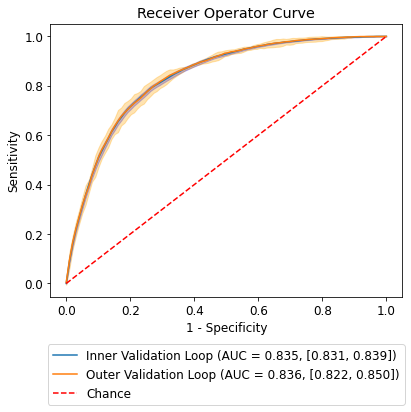

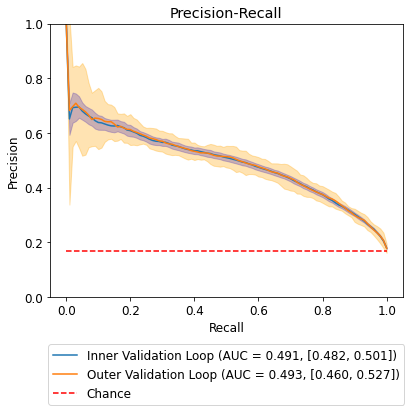

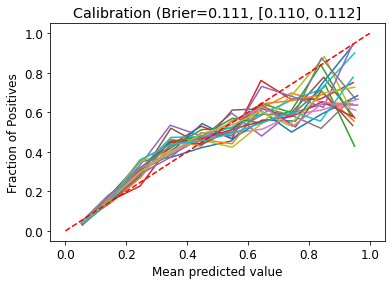

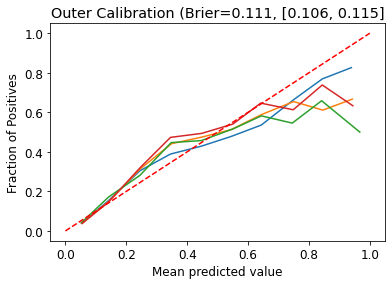

In [26]:
result_dict = lr_calibrated
name = "relative_1hr_lead_1hr_obs/mean_unpruned/lr_calibrated"
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure(figsize=(6,6))
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'), loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure(figsize=(6,6))
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision, [0, 1], [pr_baseline, pr_baseline], 'r--')
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.ylim([0,1])
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap),
    'Chance'),
    loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()


mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

#lr_calibrated["oparam"] = {"C" : 0.025, "class_weight" : "balanced", "penalty": "l1", "solver": "liblinear"}

sel_ = SelectFromModel(LogisticRegression(**lr_calibrated["oparam"]))
sel_.fit(standard_data.iloc[:,1:], labels)

SelectFromModel(estimator=LogisticRegression(C=0.02, class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [28]:
selected_feat = (data.iloc[:,1:]).columns[(sel_.get_support())]
print(len(selected_feat))
for i in range(len(selected_feat)):
    print(selected_feat[i])

with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned/lr_calibrated_selected_feats.pkl", "wb") as f:
    pickle.dump(selected_feat, f)

129
LOS
Age
APACHEIVscore
UrgentAdmission
NumBeds
TeachingStatus
Gender
AdmitHeight
HistAICD
HistAngina
HistArrythmia
HistCABG
HistHypertension
HistPacemaker
HistPulmEmb
HistHeartTransp
HistHypercalcemia
Histhyperthyroid
Histhypothyroid
HistSteroid Use
HistHypersplenism
HistPUD
HistLiverTransp
HistAplasticAnemia
HistChemotherapy
HistRadiationTherapy
HistCancer
HistOncology
HistMyeloproliferativeDisease
HistSickleCellDisease
HistImmuneSuppr
HistDementia
HistSeizures
HistTIA
HistCOPD
HistRespiratoryFail
HistRestrictiveDis
HistLungTransp
HistStoneDisease
HistNeurogenicBladd
HistRheumatic
relative_1hr_lead_1hr_obsAdrenergicBronchodilators
relative_1hr_lead_1hr_obsaminoglycosides
relative_1hr_lead_1hr_obsAnticholinergicBronchodilators
relative_1hr_lead_1hr_obsAnticholinergics
relative_1hr_lead_1hr_obsAntidiarrheals
relative_1hr_lead_1hr_obsAntiemetics
relative_1hr_lead_1hr_obsAntihistamines
relative_1hr_lead_1hr_obsBenzodiazepines
relative_1hr_lead_1hr_obsBetaBlockers
relative_1hr_lead_1hr_

In [29]:
dropped_feat = (data.iloc[:,1:]).columns[np.logical_not(sel_.get_support())]
print(len(dropped_feat))
for i in range(len(dropped_feat)):
    print(dropped_feat[i])

with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned/lr_calibrated_dropped_feats.pkl", "wb") as f:
    pickle.dump(dropped_feat, f)

65
AdmitWeight
HistCHF
HistMI
HistPVD
HistPCI
HistValveDis
HistVenThromb
HistCushing
Histdiabetes
HistCirrhosis
HistClottingDisorder
HistHemolyticAnemia
HistHypercoagulableCondition
HistIntracranialMass
HistNeuromuscularDis
HistStrokes
HistAsthma
HistSarcoidosis
HistRenalFail
HistRenalInsuff
HistRTA
HistRenalTransp
relative_1hr_lead_1hr_obsAcetaminophen
relative_1hr_lead_1hr_obsAnticoagulants
relative_1hr_lead_1hr_obsBarbiturates
relative_1hr_lead_1hr_obsCalciumChannelBlockers
relative_1hr_lead_1hr_obsClassVAntiarrhythmics
relative_1hr_lead_1hr_obsColloidFluids
relative_1hr_lead_1hr_obsGlucocorticoids
relative_1hr_lead_1hr_obsInsulins
relative_1hr_lead_1hr_obsLaxatives
relative_1hr_lead_1hr_obsMethylxanthines
relative_1hr_lead_1hr_obsSodiumChannelBlockers
relative_1hr_lead_1hr_obsSomatostatin
relative_1hr_lead_1hr_obsTricyclicAntidepressants
relative_1hr_lead_1hr_obsVasodilators
last_eyes_GCS
last_temp
sofa_score
qsofa_sys_bp
suspected_sepsis
septic_shock
comorbidity_hypunc
comorbidity

In [30]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned/lr_calibrated_dropped_feats.pkl", "rb") as f:
    dropped_feat = pickle.load(f)

data_pruned = data.drop(labels=dropped_feat, axis=1)

In [31]:
# Coefficients
clf = LogisticRegression(**lr_calibrated["oparam"])
clf.fit(standard_data.iloc[:,1:], labels)
# Visualizing Coefficients
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(clf.coef_))]
sorted_coeff = clf.coef_[0][np.argsort(-np.abs(clf.coef_))]

C:\Users\Ryan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


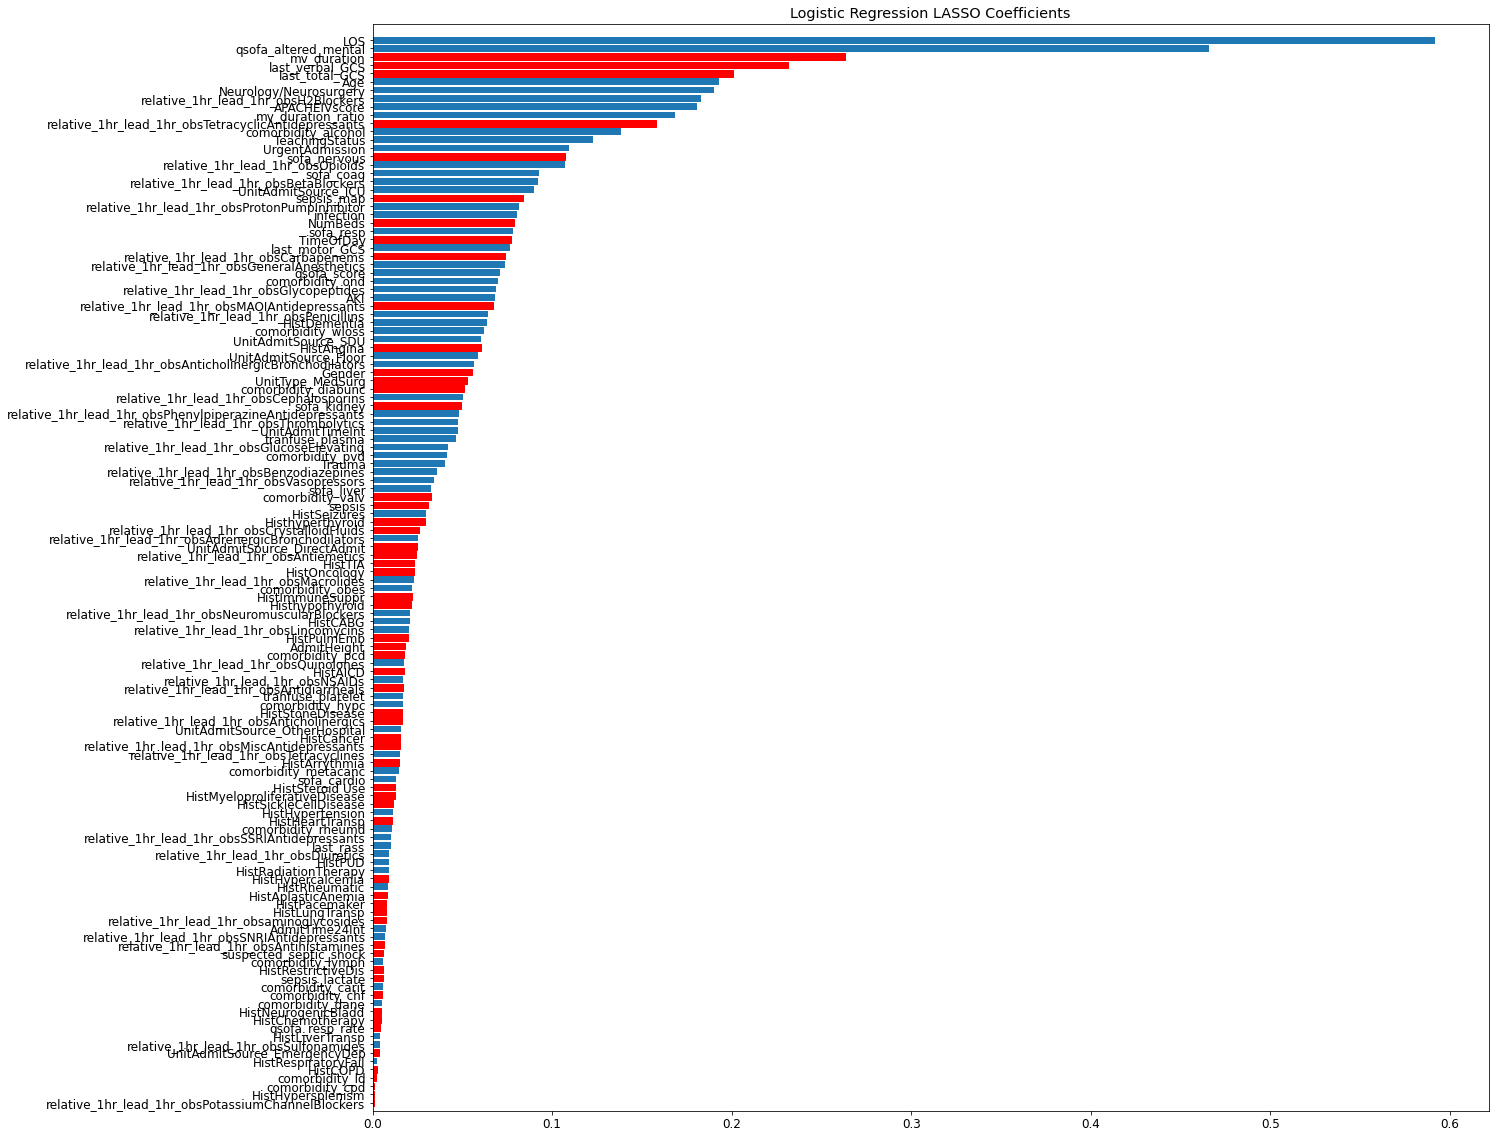

In [32]:
plt.figure(figsize=(20,20))
x = np.flip(np.arange(len(selected_feat)))
barlist = plt.barh(x, np.abs(sorted_coeff[0][:len(selected_feat)]))
plt.yticks(x, sorted_selected_feat[0][:len(selected_feat)])
plt.ylim(-1, len(selected_feat)+1)
temp = np.where(sorted_coeff[0][:len(selected_feat)] < 0)[0]
for i in temp:
    barlist[i].set_color('r')
plt.title("Logistic Regression LASSO Coefficients")
plt.show()

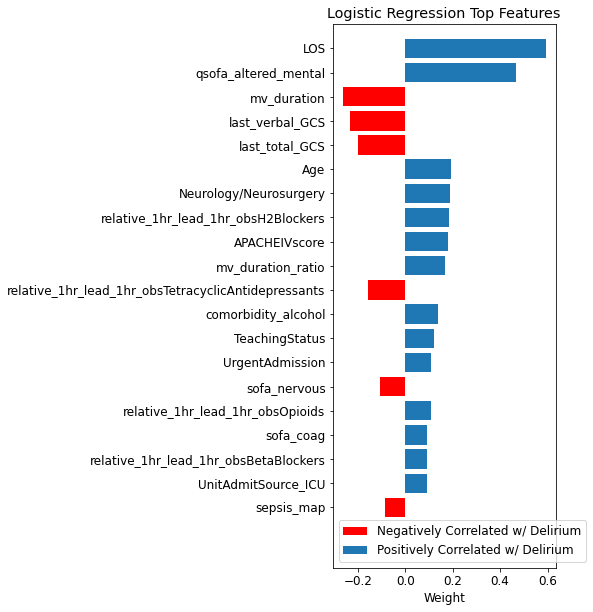

In [33]:
x = np.flip(np.arange(20))
plt.figure(figsize=(4,10))
temp = np.where(sorted_coeff[0][:20] < 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]), color='r')
temp = np.where(sorted_coeff[0][:20] >= 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]))

temp = sorted_selected_feat[0][:20]
temp_x = ["Mean Verbal GCS",
        "Min Bicarbonate",
        "APACHE IV Score",
        "Neurology Admission",
        "Max BUN",
        "Min RBC",
        "Precedex",
        "Max Potassium",
        "History of Dementia",
        "Age",
        "Adrenergic Bronchodilators",
        "Trauma Admission",
        "Min Chloride",
        "Anticoagulants",
        "General Anesthetics",
        "Stepdown Unit",
        "Haloperidol",
        "History of Angina",
        "Stepdown Unit",
        "ICU Admit Source",
        "Min MCH"]

plt.yticks(x, temp)
plt.ylim(-2.5, 20)

plt.title("Logistic Regression Top Features")
plt.legend(["Negatively Correlated w/ Delirium", "Positively Correlated w/ Delirium"])
#plt.tight_layout()
plt.xlabel("Weight")
plt.savefig('../figures/relative_1hr_lead_1hr_obs/mean_unpruned/lr_calibrated_coefficients_short.png', dpi=500,bbox_inches = "tight")
plt.show()

# Random Forest

C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator _SigmoidCalibration from version 0.22.2.post1 when using

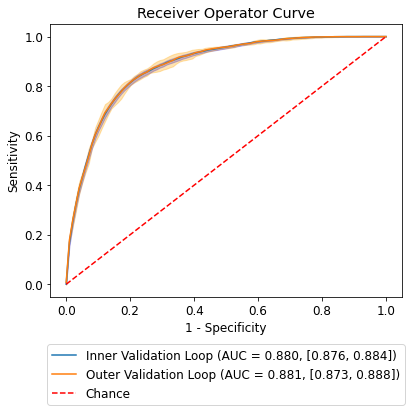

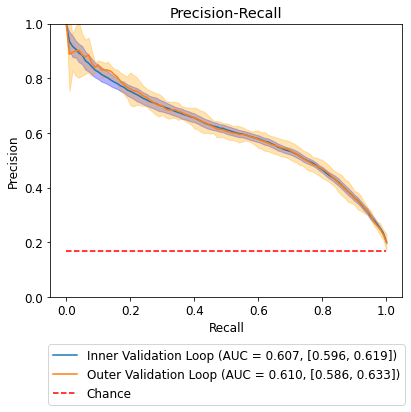

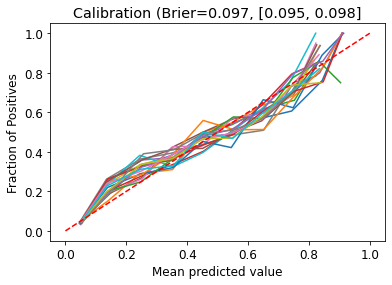

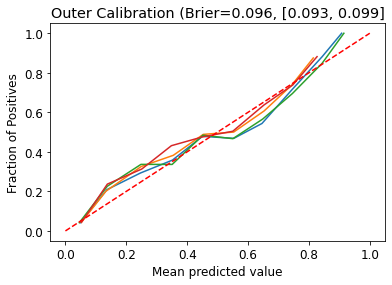

In [15]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_pruned/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_1hr_lead_1hr_obs/mean_pruned/rf"
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure(figsize=(6,6))
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'), loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])



plt.figure(figsize=(6,6))
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision, [0, 1], [pr_baseline, pr_baseline], 'r--')
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.ylim([0,1])
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap),
    'Chance'),
    loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()


mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

In [16]:
result_dict["oparam"]

{'ccp_alpha': 0.00030359443411635866,
 'max_depth': 80,
 'max_samples': 0.643973477931626,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 250}

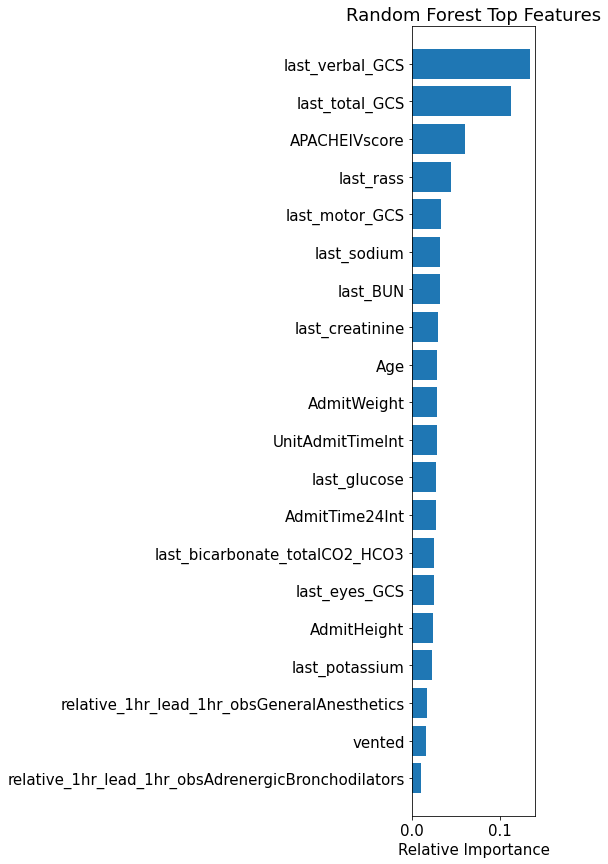

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data_pruned.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data_pruned.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

# CatBoost

In [14]:
catboost_result = run_parallel_cross_validation(data, 
												"CatBoostClassifier",
												{"n_estimators": 3000},
												"from catboost import CatBoostClassifier",
												run_once = True,
												bayes=False,
												calibrate=True,
												n_jobs=2,
												run_id=5,
												outer_tuning=True,
												outer_labels=labels)

Inner Validation Complete


In [15]:
import pickle
with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned/catboost", "wb") as f:
    pickle.dump(catboost_result, f)

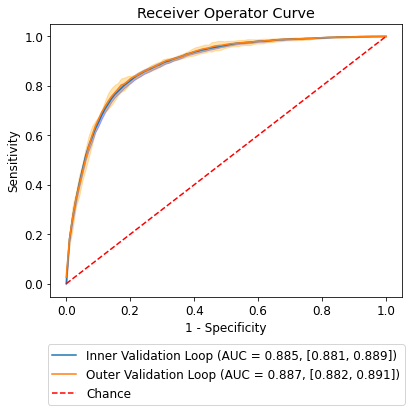

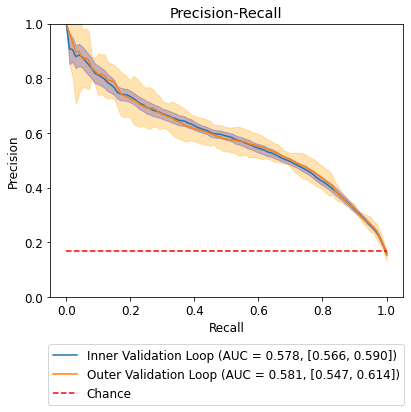

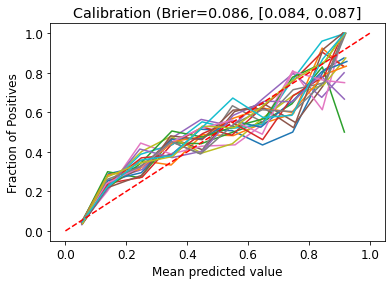

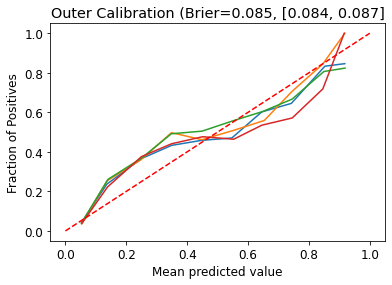

In [16]:
# with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned/catboost", "rb") as f:
#     catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_1hr_obs/mean_unpruned/catboost"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure(figsize=(6,6))
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'), loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])



plt.figure(figsize=(6,6))
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision, [0, 1], [pr_baseline, pr_baseline], 'r--')
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.ylim([0,1])
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap),
    'Chance'),
    loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()


mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()


 1m 20s	remaining: 11.3s
2631:	learn: 0.1934938	total: 1m 20s	remaining: 11.3s
2632:	learn: 0.1934534	total: 1m 20s	remaining: 11.2s
2633:	learn: 0.1934361	total: 1m 20s	remaining: 11.2s
2634:	learn: 0.1933894	total: 1m 20s	remaining: 11.2s
2635:	learn: 0.1933605	total: 1m 20s	remaining: 11.2s
2636:	learn: 0.1933169	total: 1m 20s	remaining: 11.1s
2637:	learn: 0.1932703	total: 1m 20s	remaining: 11.1s
2638:	learn: 0.1932445	total: 1m 20s	remaining: 11.1s
2639:	learn: 0.1932157	total: 1m 20s	remaining: 11s
2640:	learn: 0.1932018	total: 1m 20s	remaining: 11s
2641:	learn: 0.1931790	total: 1m 20s	remaining: 11s
2642:	learn: 0.1931482	total: 1m 21s	remaining: 10.9s
2643:	learn: 0.1931096	total: 1m 21s	remaining: 10.9s
2644:	learn: 0.1930766	total: 1m 21s	remaining: 10.9s
2645:	learn: 0.1930391	total: 1m 21s	remaining: 10.8s
2646:	learn: 0.1930048	total: 1m 21s	remaining: 10.8s
2647:	learn: 0.1929802	total: 1m 21s	remaining: 10.8s
2648:	learn: 0.1929512	total: 1m 21s	remaining: 10.8s
2649:	lea

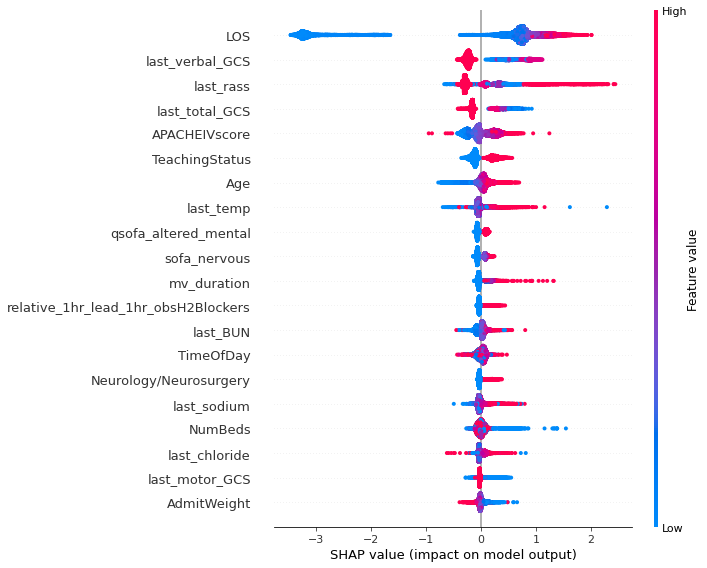

In [47]:
import shap
from catboost import CatBoostClassifier
clf = CatBoostClassifier(**{"n_estimators": 3000})
clf.fit(data.iloc[:,1:], labels)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data.iloc[:, 1:])
shap.summary_plot(shap_values, data.iloc[:, 1:], show=False)
plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

In [34]:
catboost_result = run_parallel_cross_validation(data_pruned, 
												"CatBoostClassifier",
												{"n_estimators": 3000},
												"from catboost import CatBoostClassifier",
												run_once = True,
												bayes=False,
												calibrate=True,
												n_jobs=2,
												run_id=5,
												outer_tuning=True,
												outer_labels=labels)

In [ ]:
import pickle
with open("../pickle/relative_1hr_lead_1hr_obs/mean_pruned/catboost_unbalanced", "wb") as f:
    pickle.dump(catboost_result, f)

In [ ]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_pruned/catboost_unbalanced", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_1hr_obs/mean_pruned/catboost_unbalanced"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator _SigmoidCalibration from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator CalibratedClassifierCV from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


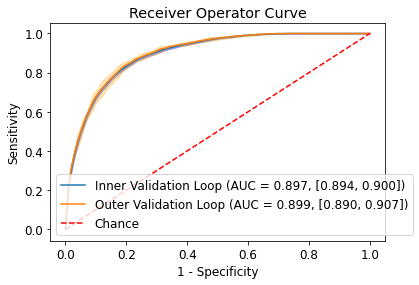

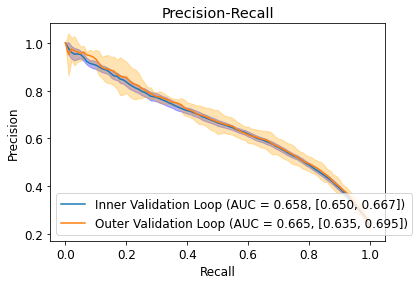

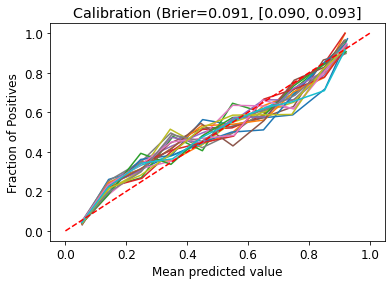

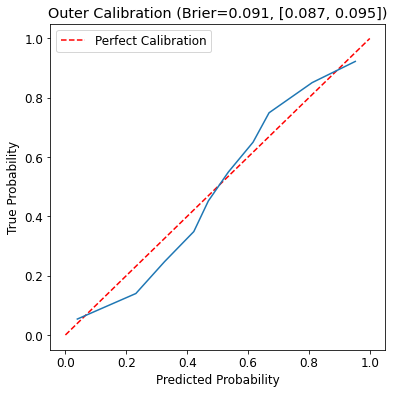

In [16]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_pruned/catboost_unbalanced", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_1hr_obs/mean_pruned/catboost"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure(figsize=(6,6))
opred = result_dict["ofullpred"]
olabels = result_dict["olabels"]

pred = []
lab = []
for i in range(len(opred)):
    for j in range(len(opred[i])):
        pred.append(opred[i][j])
        lab.append(olabels[i][j])

prob_true, prob_pred = calibration_curve(
			lab, pred, n_bins=10
)

plt.plot([0,1],[0,1], 'r--')
plt.plot(prob_true, prob_pred)
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_brier, low_brier, up_brier))
plt.legend(["Perfect Calibration"])
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()


#print(rf_result["oparam"])

Outer Loop 0
Threshold: 0.1152184007249986
Specificity: 0.817301484828922
Sensitivity: 0.8168859649122807
PPV: 0.46737766624843163
NPV: 0.9578814627994956
Outer Loop 1
Threshold: 0.11088498859820299
Specificity: 0.820212535241813
Sensitivity: 0.820675105485232
PPV: 0.48413192283758555
NPV: 0.9569838056680162
Outer Loop 2
Threshold: 0.11390959372597767
Specificity: 0.8124320799826125
Sensitivity: 0.8119122257053292
PPV: 0.473780487804878
NPV: 0.9540581929555896
Outer Loop 3
Threshold: 0.12130042598746571
Specificity: 0.8259162303664922
Sensitivity: 0.8264887063655031
PPV: 0.5021834061135371
NPV: 0.9572692793931732


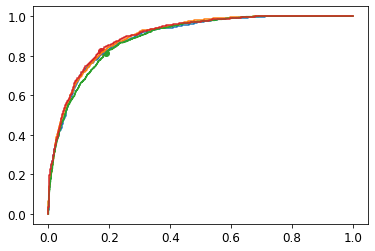

Average Specificity: (0.81896558260496, 0.8279350706838263, 0.8099960945260937)
Average Sensitivity: (0.8189905006170863, 0.8287818915563528, 0.8091991096778198)
Average PPV: (0.4818683707511081, 0.5060566846442414, 0.4576800568579749)
Average NPV: (0.9565481852040686, 0.9592559827171756, 0.9538403876909616)


In [18]:
from sklearn import metrics

total_spec = np.zeros(4)
total_sens = np.zeros(4)
total_ppv = np.zeros(4)
total_npv = np.zeros(4)


plt.figure()
for i in range(4):
    print("Outer Loop {}".format(i))
    fpr, tpr, thresholds = metrics.roc_curve(result_dict["olabels"][i], result_dict["ofullpred"][i])
    operating_point = np.argmin(abs(tpr-(1-fpr)))
    print("Threshold: {}".format(thresholds[operating_point]))
    plt.plot(fpr, tpr)
    plt.scatter(fpr[operating_point], tpr[operating_point])

    print("Specificity: {}".format(1-fpr[operating_point]))
    total_spec[i] = 1-fpr[operating_point]
    print("Sensitivity: {}".format(tpr[operating_point]))
    total_sens[i] = tpr[operating_point]



    tn, fp, fn, tp = metrics.confusion_matrix(result_dict["olabels"][i],  result_dict["ofullpred"][i] >= thresholds[operating_point]).ravel()
    print("PPV: {}".format(tp/(tp+fp)))
    print("NPV: {}".format(tn/(tn+fn)))

    total_ppv[i] = tp/(tp+fp)
    total_npv[i] = tn/(tn+fn)

#plt.xlim([0.2, 0.3])
plt.show()

print("Average Specificity: {}".format(compute_confidence(total_spec)))
print("Average Sensitivity: {}".format(compute_confidence(total_sens)))
print("Average PPV: {}".format(compute_confidence(total_ppv)))
print("Average NPV: {}".format(compute_confidence(total_npv)))

: 0.1967239	total: 1m 40s	remaining: 14.1s
2631:	learn: 0.1966946	total: 1m 40s	remaining: 14s
2632:	learn: 0.1966749	total: 1m 40s	remaining: 14s
2633:	learn: 0.1966591	total: 1m 40s	remaining: 13.9s
2634:	learn: 0.1966257	total: 1m 40s	remaining: 13.9s
2635:	learn: 0.1965980	total: 1m 40s	remaining: 13.9s
2636:	learn: 0.1965776	total: 1m 40s	remaining: 13.8s
2637:	learn: 0.1965521	total: 1m 40s	remaining: 13.8s
2638:	learn: 0.1965347	total: 1m 40s	remaining: 13.8s
2639:	learn: 0.1965164	total: 1m 40s	remaining: 13.7s
2640:	learn: 0.1964902	total: 1m 40s	remaining: 13.7s
2641:	learn: 0.1964655	total: 1m 40s	remaining: 13.7s
2642:	learn: 0.1964376	total: 1m 40s	remaining: 13.6s
2643:	learn: 0.1964162	total: 1m 40s	remaining: 13.6s
2644:	learn: 0.1963963	total: 1m 40s	remaining: 13.5s
2645:	learn: 0.1963611	total: 1m 40s	remaining: 13.5s
2646:	learn: 0.1963232	total: 1m 40s	remaining: 13.5s
2647:	learn: 0.1963013	total: 1m 40s	remaining: 13.4s
2648:	learn: 0.1962848	total: 1m 41s	remain

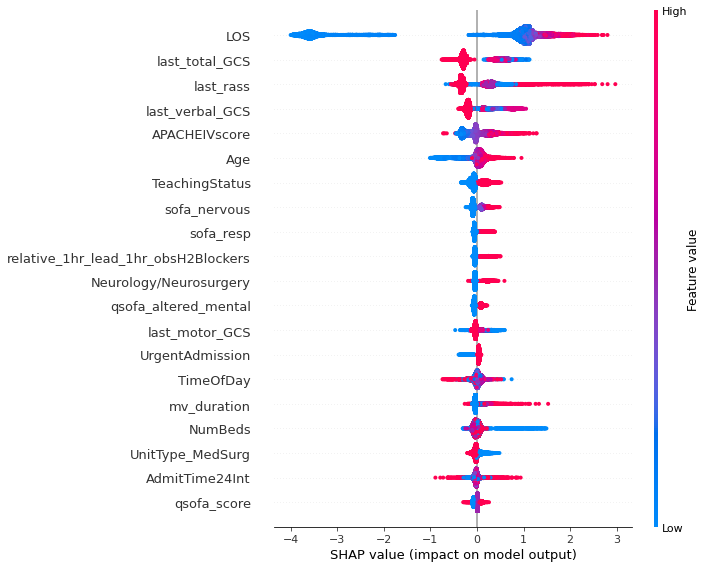

In [17]:
import shap
from catboost import CatBoostClassifier
clf = CatBoostClassifier(**{"n_estimators": 3000})
clf.fit(data_pruned.iloc[:,1:], labels)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data_pruned.iloc[:, 1:])
shap.summary_plot(shap_values, data_pruned.iloc[:, 1:], show=False)
plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

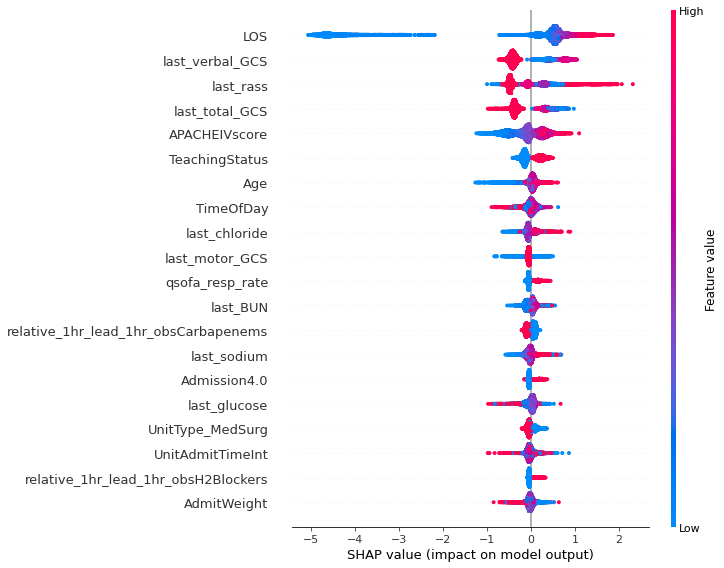

In [24]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data_pruned.iloc[:, 1:])
shap.summary_plot(shap_values, data_pruned.iloc[:, 1:], show=False)
plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

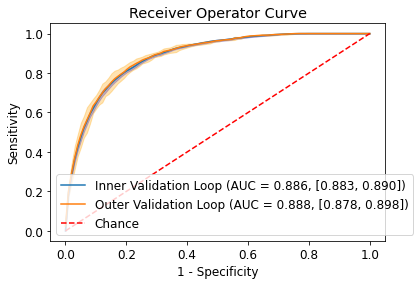

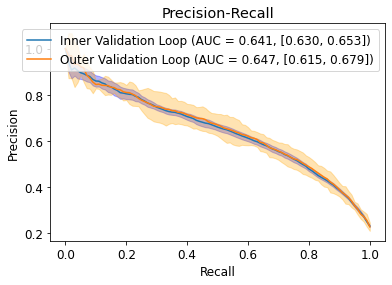

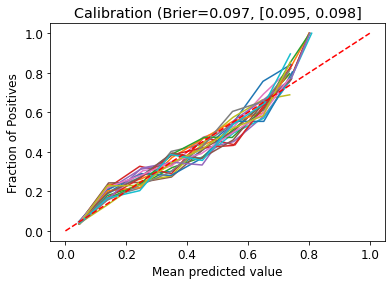

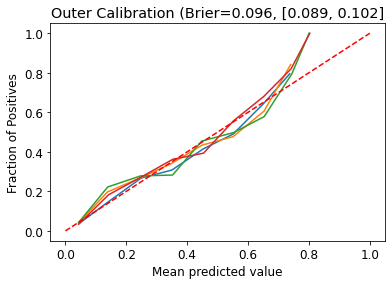

In [13]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_pruned/catboost_unbalanced", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_1hr_obs/mean_pruned/catboost_unbalanced"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

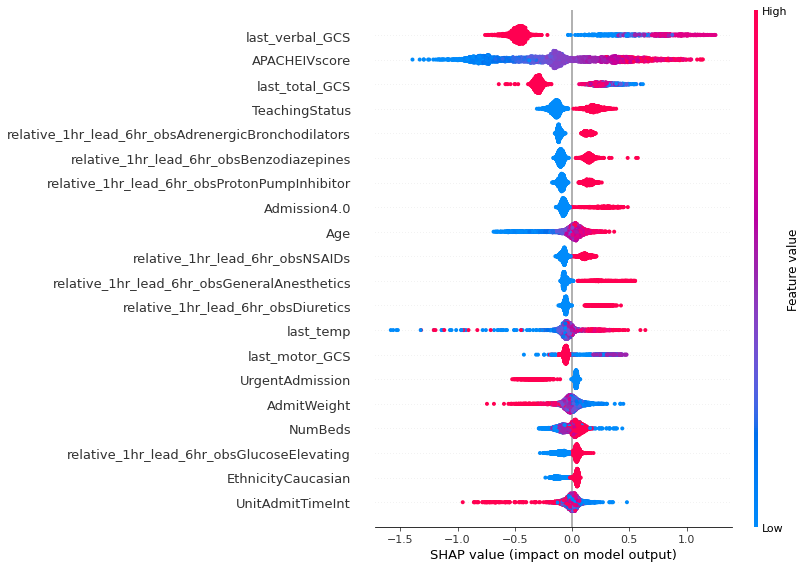

In [16]:
import shap
explainer = shap.TreeExplainer(catboost_result["imodels"][0])
temp_data = catboost_result["ipatid"][0].to_frame().merge(data, on="PatientStayID", how="inner")
shap_values = explainer.shap_values(temp_data.iloc[:, 1:])
shap.summary_plot(shap_values, temp_data.iloc[:, 1:], show=False)
plt.savefig("../figures/relative_1hr_lead_6hr_obs/mean_unpruned/catboost_shapley_plot_full.png", bbox_inches="tight")

In [47]:
clf

C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator StackingClassifier from version 0.22.2.post1 when 

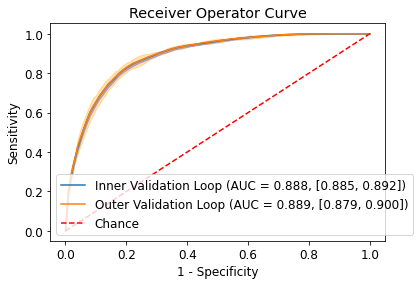

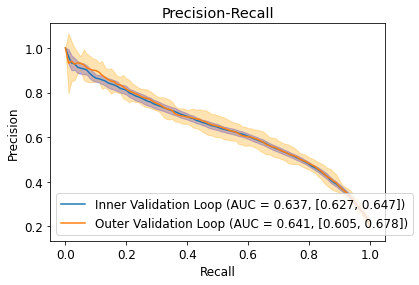

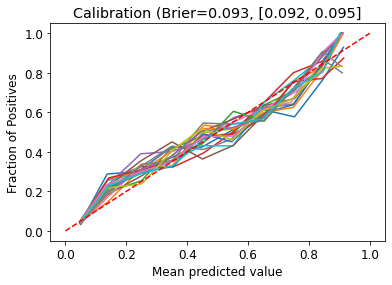

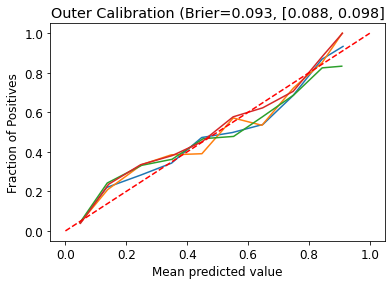

In [15]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_pruned/stacked", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_1hr_obs/mean_pruned/stacked"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])